

---
---

# **SME0882 - CONSULTORIA ESTATÍSTICA - GRUPO 4**

<br>

## **FATORES QUE INTERFEREM NA OCORRÊNCIA DE FALHAS EM CANAVIAIS**

<br>

---
---

<br> 

**Integrantes**:

*Júlio Trevisan Centanin*<br>
*Mariana Faria Ribeiro de Souza*<br>
*Lucas Della Montagna do Nascimento*<br>
*Matheus de Tulio*<br>
*Mauricio Florencio de Santana*<br>
*Lucas Roberto O. Lopes*<br>
*Lucas Yuki Okuno*<br>
*Lua Nardi Quito*<br>

<br>

Instituto de Ciências Matemáticas e de Computação - USP


----

O objetivo desse projeto é analisar, via métodos estatísticos, fatores que interferem na ocorrência de falhas em canaviais apontando direções no sentido de minimizá-las. Além disso, utilizar modelagem matemática para antecipar eventos de falha, compreender suas falhas e gerenciar os riscos envolvidos nesse processo.

----

---
---

# **1 - DADOS**

---
---



In [2]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Lendo o conjunto de dados
df = pd.read_csv("/content/raizen_fazenda_zona_talhao.csv", sep=';')

#5 primeiras entradas do conjunto de treino
df.head()

,Area_Plantio,Perc_Falha,Perc_Infest_Inv,Ciclo,CD_CLAS_DECL,QT_IDMIN_PLA,QT_IDMAX_PLA,CD_SIST_PLAN,Variedade,Estagio,...,Vel_vento_ms,Rad_Solar_MJm2,Chuva,EPT_mm,dia,mes,ano,Fazenda,Zona,Talhao
0,8.72,0.0086,0.0,18M,1.0,12,15,6.0,RB855156,1o. Corte - 18 Meses,...,0.750,18.405,87.40,121.375,17,3,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,be3c152f6f6bcd5f85f9e4cba49b1e48
1,7.88,0.0280,0.0,18M,1.0,12,15,6.0,RB855156,Cana Planta - 18 m,...,1.100,15.220,62.35,98.150,23,7,2016,a35d74fdb771def73cb97252b7d150db,ade76ff25149e0df3a56010f12ea82fd,9d08099943f8627959cfb8ecee0d2f5d
2,4.24,0.0014,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,1.100,13.955,58.70,69.660,11,7,2016,b5ccb3e35c52f544963d0754ca443df5,7d919225f11eb7af31bf9600b63a7a98,71db8a6cad03244e6e50f0ad8bc95a65
3,5.29,0.3009,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.465,10.480,119.70,54.700,28,5,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,06cd248dd1409b804444bd9ad5533d1d
4,3.49,0.0438,0.0,18M,1.0,12,15,6.0,RB966928,Descanso,...,0.450,10.245,67.85,54.450,5,7,2016,00b6e31e17d62736a81d38e4a61555a3,06cd248dd1409b804444bd9ad5533d1d,e03a89536262b6a0e2beabd90a841c43


In [ ]:
#verificando as dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \nObservações: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	49 
Observações: 	2749



In [ ]:
#identificando os tipos de cada variável
print(df.dtypes)

Area_Plantio       float64
Perc_Falha         float64
Perc_Infest_Inv    float64
Ciclo               object
CD_CLAS_DECL       float64
QT_IDMIN_PLA         int64
QT_IDMAX_PLA         int64
CD_SIST_PLAN       float64
Variedade           object
Estagio             object
Ambiente           float64
Ph                 float64
Mo                 float64
P                  float64
K                  float64
Ca                 float64
Mg                 float64
H_al               float64
Al                 float64
S                  float64
Sb                 float64
Ctc                float64
V                  float64
CORR_T             float64
FERT_KG            float64
FERT_L             float64
FUNG_L             float64
HERB_KG            float64
HERB_L             float64
INSET_KG           float64
INSET_L            float64
RESI_M3              int64
RESI_T               int64
Temp_Med           float64
Temp_max           float64
Temp_min           float64
UR_med             float64
U

**Construindo a variável data**

In [ ]:
data = []
for i in range(df.shape[0]):
  dia = str(df["dia"][i])
  mes = str(df["mes"][i])
  ano = str(df["ano"][i])
  aux = datetime.strptime("{}/{}/{}".format(dia, mes, ano), "%d/%m/%Y")
  data.append(aux.strftime("%d/%m/%Y"))

df["data"] = data
df["data"] = pd.to_datetime(df["data"])
df["data"]

0      2016-03-17
1      2016-07-23
2      2016-11-07
3      2016-05-28
4      2016-05-07
          ...    
2744   2017-06-26
2745   2017-06-26
2746   2017-06-26
2747   2017-06-21
2748   2017-06-20
Name: data, Length: 2749, dtype: datetime64[ns]

#**ANÁLISE EXPLORATÓRIA DE DADOS**

**Verificando dados duplicados**

In [ ]:
df.duplicated().sum()

0

**Verificando a quantidade de dados faltantes**

In [ ]:
df.isnull().sum()

Area_Plantio        0
Perc_Falha          0
Perc_Infest_Inv     0
Ciclo               0
CD_CLAS_DECL       88
QT_IDMIN_PLA        0
QT_IDMAX_PLA        0
CD_SIST_PLAN        1
Variedade           0
Estagio             0
Ambiente           33
Ph                 19
Mo                 19
P                  22
K                  19
Ca                 19
Mg                 19
H_al               19
Al                 19
S                  19
Sb                 19
Ctc                19
V                  19
CORR_T              0
FERT_KG            16
FERT_L              0
FUNG_L              0
HERB_KG             0
HERB_L              0
INSET_KG            0
INSET_L             0
RESI_M3             0
RESI_T              0
Temp_Med            0
Temp_max            0
Temp_min            0
UR_med              0
UR_max              0
Ur_min              0
Vel_vento_ms        0
Rad_Solar_MJm2      0
Chuva               0
EPT_mm              0
dia                 0
mes                 0
ano       

**Correlação entre a variável resposta e as demais**

In [ ]:
matriz_corr = df.corr('spearman')
matriz_corr["Perc_Falha"].sort_values()

Temp_max          -0.120566
Temp_Med          -0.094375
Temp_min          -0.090240
Ph                -0.086978
P                 -0.082148
Mg                -0.073869
Perc_Infest_Inv   -0.062633
Ctc               -0.059587
Ca                -0.059034
RESI_M3           -0.057350
Sb                -0.057051
V                 -0.056109
K                 -0.051746
CORR_T            -0.048969
EPT_mm            -0.030741
S                 -0.026096
H_al              -0.018921
HERB_KG           -0.017280
Rad_Solar_MJm2     0.003931
INSET_KG           0.004123
QT_IDMIN_PLA       0.012975
mes                0.016892
Al                 0.018244
FUNG_L             0.025425
INSET_L            0.025434
Area_Plantio       0.027805
CD_CLAS_DECL       0.031477
QT_IDMAX_PLA       0.032569
Ambiente           0.038520
FERT_L             0.046127
dia                0.047238
Mo                 0.051545
Ur_min             0.054669
ano                0.062891
UR_med             0.075033
Vel_vento_ms       0

**Verificação dos ciclos e estágios presentes no conjunto de dados**

In [ ]:
np.unique(df["Ciclo"])

array(['18M', 'Ano', 'Inverno'], dtype=object)

In [ ]:
np.unique(df["Estagio"])

array(['1o. Corte - 18 Meses', '1o. Corte-12M Inv.', '2o. Corte',
       '6o. Corte', 'Cana Planta - 18 m', 'Descanso', 'Passagem'],
      dtype=object)

**Verificação da área de plantio e percentual de falha**

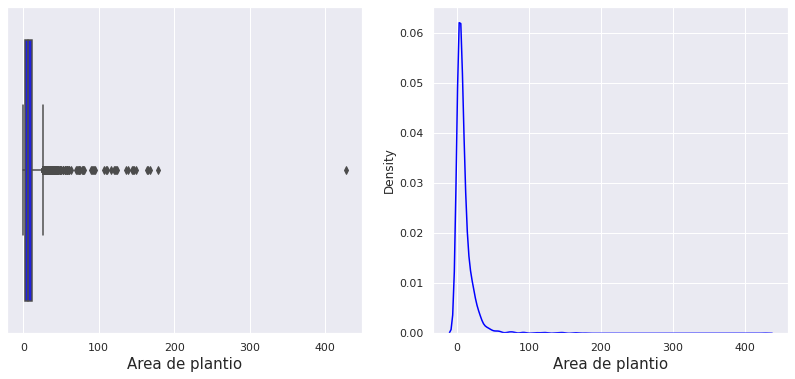

In [ ]:
sns.set_theme(style = "darkgrid")
plt.figure(figsize = (14,6))
plt.subplot(121); sns.boxplot(data = df, x = "Area_Plantio", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = df, x = "Area_Plantio", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.show()

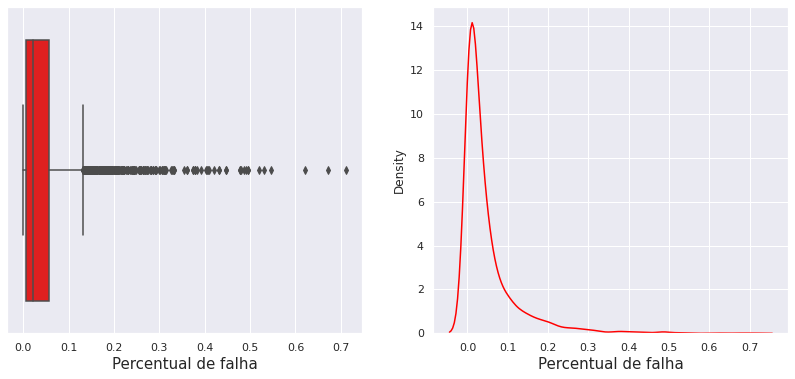

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(121); sns.boxplot(data = df, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = df, x = "Perc_Falha", color = "red")
plt.xlabel("Percentual de falha", fontsize = 15)
plt.show()

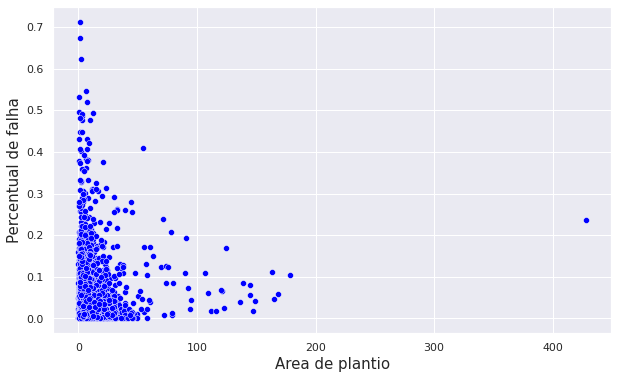

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Area_Plantio", y = "Perc_Falha", color = "blue")
plt.xlabel("Area de plantio", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)
plt.show()

In [ ]:
df[["Area_Plantio", "Perc_Falha"]].corr("spearman")

,Area_Plantio,Perc_Falha
Area_Plantio,1.000000,0.027805
Perc_Falha,0.027805,1.000000


In [ ]:
df[["Area_Plantio", "Perc_Falha"]].describe()

,Area_Plantio,Perc_Falha
count,2749.000000,2749.000000
mean,10.372497,0.048274
std,16.867489,0.072517
min,0.030000,0.000000
25%,2.850000,0.006900
50%,6.060000,0.022300
75%,11.930000,0.056600
max,427.877000,0.711800


**Verificação dos minerais presentes no solo**

In [ ]:
df[["Ph", "Mo", "P", "K", "Ca", "Mg", "H_al", "Al", "S", "Sb", "Ctc", "V"]].describe()

,Ph,Mo,P,K,Ca,Mg,H_al,Al,S,Sb,Ctc,V
count,2730.000000,2730.000000,2727.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,5.033279,13.457764,12.081398,1.813457,17.964815,8.274724,21.151951,1.845689,0.099817,26.677723,46.992665,50.670321
std,0.800032,6.335086,12.819983,1.841477,13.355803,6.158806,9.289028,3.217191,1.036977,19.793444,24.165811,19.093093
min,2.950000,4.100000,0.300000,0.140000,0.865000,0.525000,0.315000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.550000,9.000000,4.500000,0.695000,9.760000,4.492500,15.500000,0.235000,0.000000,15.075000,34.500000,40.500000
50%,4.950000,12.000000,7.500000,1.160000,14.672500,7.000000,19.500000,0.590000,0.000000,22.222500,42.000000,53.500000
75%,5.350000,16.000000,14.000000,2.418750,21.425000,9.790000,24.500000,1.960000,0.000000,32.510000,54.000000,63.000000
max,12.000000,51.000000,97.000000,18.015000,168.000000,78.130000,181.500000,46.055000,22.000000,187.260000,201.000000,98.000000


<Figure size 720x432 with 0 Axes>

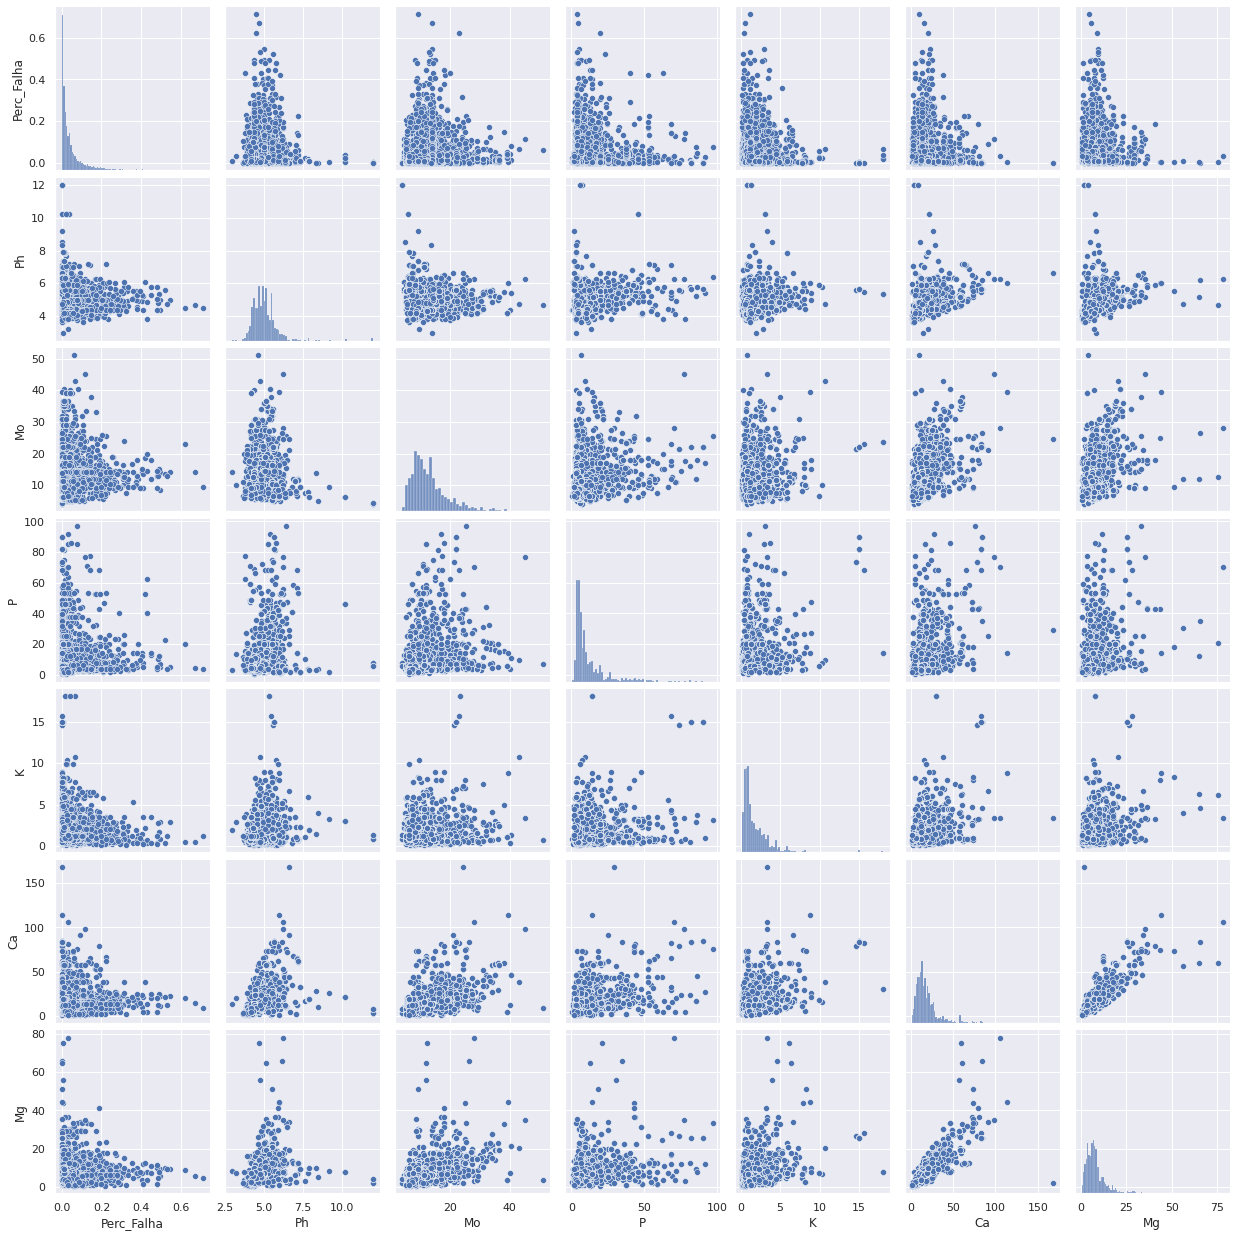

In [ ]:
plt.figure(figsize = (10,6))
sns.pairplot(data = df, vars = ["Perc_Falha", "Ph", "Mo", "P", "K", "Ca", "Mg"])
plt.show()

**Verificação da relação entre chuva e velocidade do vento com percentual de falha**

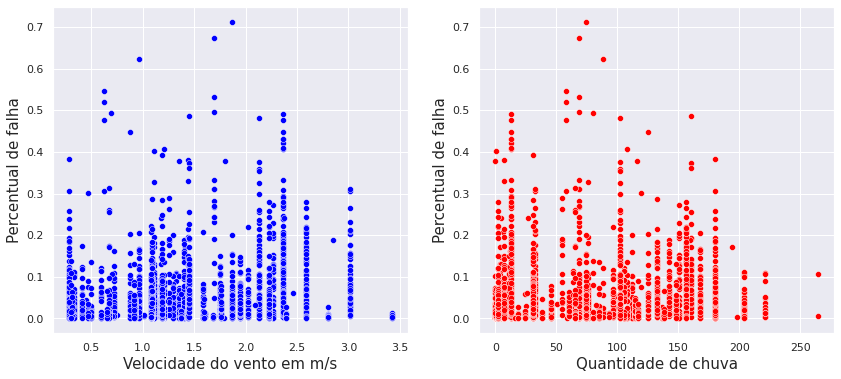

In [ ]:
plt.figure(figsize = (14,6))

plt.subplot(121); sns.scatterplot(data = df, x = "Vel_vento_ms", y = "Perc_Falha", color = "blue")
plt.xlabel("Velocidade do vento em m/s", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.subplot(122); sns.scatterplot(data = df, x = "Chuva", y = "Perc_Falha", color = "red")
plt.xlabel("Quantidade de chuva", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)

plt.show()

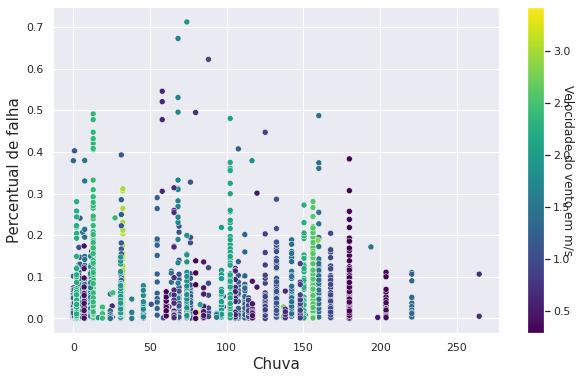

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Chuva", y = "Perc_Falha", c = df["Vel_vento_ms"], cmap = 'viridis')
plt.xlabel("Chuva", fontsize = 15)
plt.ylabel("Percentual de falha", fontsize = 15)
# Necessário normalizar os dados para plotar a barra de cor
norm = plt.Normalize(df['Vel_vento_ms'].min(), df['Vel_vento_ms'].max())
sm = plt.cm.ScalarMappable(cmap ="viridis", norm = norm)
sm.set_array([])
plt.colorbar(sm).set_label('Velocidade do vento em m/s', rotation = 270)
plt.show()

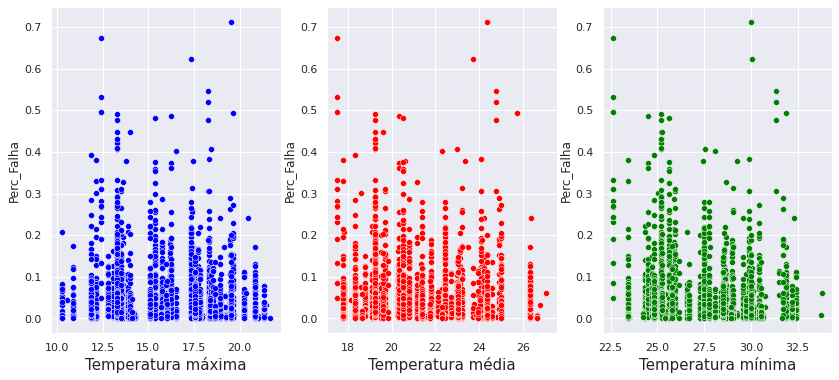

In [ ]:
plt.figure(figsize = (14,6))

plt.subplot(131); sns.scatterplot(data = df, x = "Temp_min", y = "Perc_Falha", color = "blue")
plt.xlabel("Temperatura máxima", fontsize = 15)

plt.subplot(132); sns.scatterplot(data = df, x = "Temp_Med", y = "Perc_Falha", color = "red")
plt.xlabel("Temperatura média", fontsize = 15)

plt.subplot(133); sns.scatterplot(data = df, x = "Temp_max", y = "Perc_Falha", color = "green")
plt.xlabel("Temperatura mínima", fontsize = 15)

plt.show()

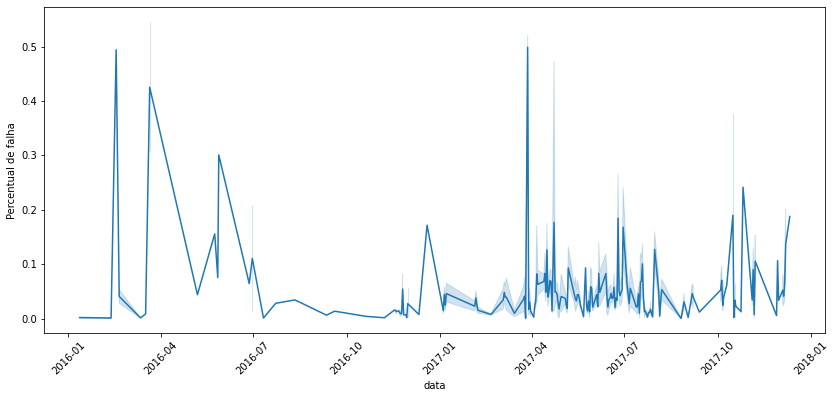

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(data = df, x = "data", y = "Perc_Falha")
plt.xticks(rotation = 45)
plt.ylabel("Percentual de falha")
plt.show()

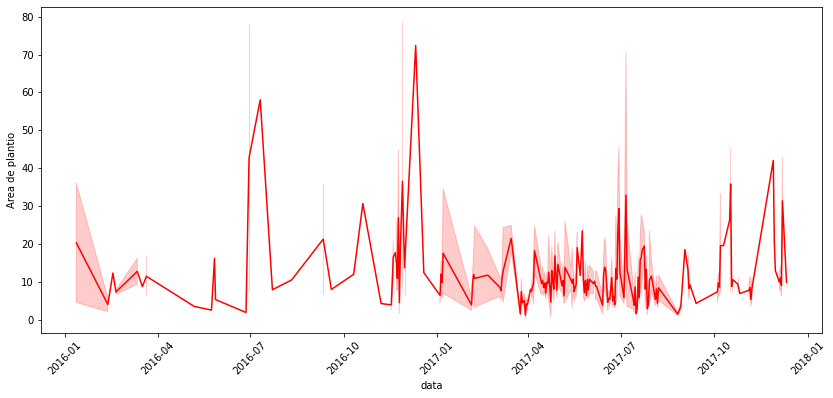

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(data = df, x = "data", y = "Area_Plantio", color = "red")
plt.xticks(rotation = 45)
plt.ylabel("Area de plantio")
plt.show()